In [1]:
%matplotlib inline
%load_ext lab_black
%load_ext autoreload
%autoreload 2

In [2]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
import requests
from PIL import Image
from datetime import datetime, timedelta
import time
from tqdm import tqdm
from typing import List, Tuple
import os
import pathlib
from io import BytesIO
import math

In [4]:
URL = (
    "https://gibs-{s}.earthdata.nasa.gov/wmts/epsg4326/best/{layer}"
    + "/default/{date}/{tile_matrix_set}/{z}/{y}/{x}.{image_format}"
)

In [5]:
def get_tile_as_image(
    layer: str,
    date: str,
    tile_matrix_set: str,
    z: int,
    y: int,
    x: int,
    image_format: str,
    s: str = "a",
) -> Image:
    """
    Returns an image tile from an image layer
    
    Args:
        s (str): Sub-doomain. Either "a", "b", "c"
        layer (str): Layer name
        date (str): Date in format "YYYY-MM-DD"
        tile_matrix_set (str): The tile matrix format
        z (int): Zoom level e.g. 0
        x (int): The x position e.g. 1
        y (int): The y posiiton e.g. 2
        image_format (str): The image format e.g. png
    
    Returns:
        Image: PIL.Image object of image tile
    """
    response = requests.get(
        URL.format(
            s="c",
            layer=layer,
            date=date,
            tile_matrix_set=tile_matrix_set,
            z=z,
            y=y,
            x=x,
            image_format=image_format,
        )
    )
    if response.status_code == 200:
        return Image.open(BytesIO(response.content))
    else:
        raise ValueError("Unable to retrieve image")

In [6]:
def tile_images_region(
    x_limits: List[int],
    y_limits: List[int],
    layer: str,
    date: str,
    tile_matrix_set: str,
    z: int,
    image_format: str,
    s: str = "a",
):
    """Builds tiled image at specified zoom level within limits provided.
    
    Args:
        s (str): Sub-domain. Either "a", "b", "c"
        layer (str): Layer name
        date (str): Date in format "YYYY-MM-DD"
        tile_matrix_set (str): The tile matrix format
        z (int): Zoom level e.g. 0
        x (int): The x position e.g. 1
        y (int): The y posiiton e.g. 2
        image_format (str): The image format e.g. png
    
    Returns:
        Image: PIL.Image object of tiled image
    """
    columns = []
    for x in range(*x_limits):
        _column = []
        for y in range(*y_limits):
            tile = get_tile_as_image(
                s=s,
                layer=layer,
                date=date,
                tile_matrix_set=tile_matrix_set,
                z=z,
                x=x,
                y=y,
                image_format=image_format,
            )
            _column.append(np.array(tile.convert("RGBA")))
        _column = np.vstack(_column)
        columns.append(_column)
    return np.hstack(columns)

In [7]:
LAYER_NAME = "Landsat_Human_Built-up_And_Settlement_Extent"
TILE_MATRIX_SET = "31.25m"
DATE = "2010-06-01"
Z = 6

In [8]:
UK_COORDINATES = {"x_limits": [37, 41], "y_limits": [6, 9]}

In [9]:
pathlib.Path(f"../data/processed/{LAYER_NAME}/").mkdir(exist_ok=True, parents=True)

In [13]:
tiled = tile_images_region(
    **UK_COORDINATES,
    layer=LAYER_NAME,
    tile_matrix_set=TILE_MATRIX_SET,
    date=DATE,
    z=Z,
    image_format="png"
)

In [14]:
filepath = f"../data/processed/{LAYER_NAME}/{LAYER_NAME}_Z_{Z}_{DATE}.png"

In [15]:
Image.fromarray(tiled).save(filepath)

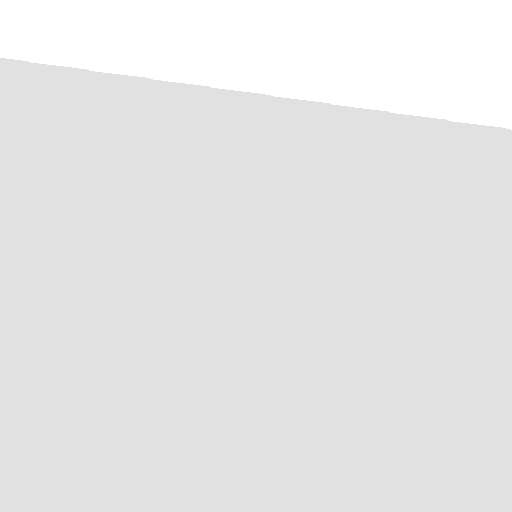

In [99]:
get_tile_as_image(
    layer=LAYER_NAME,
    tile_matrix_set=TILE_MATRIX_SET,
    date=DATE,
    z=11,
    x=1317,
    y=256,
    image_format="png",
)

In [105]:
UK_COORDINATES = {"x_limits": [80, 84], "y_limits": [14, 18]}

In [106]:
tiled = tile_images_region(
    **UK_COORDINATES,
    layer=LAYER_NAME,
    tile_matrix_set=TILE_MATRIX_SET,
    date=DATE,
    z=7,
    image_format="png"
)

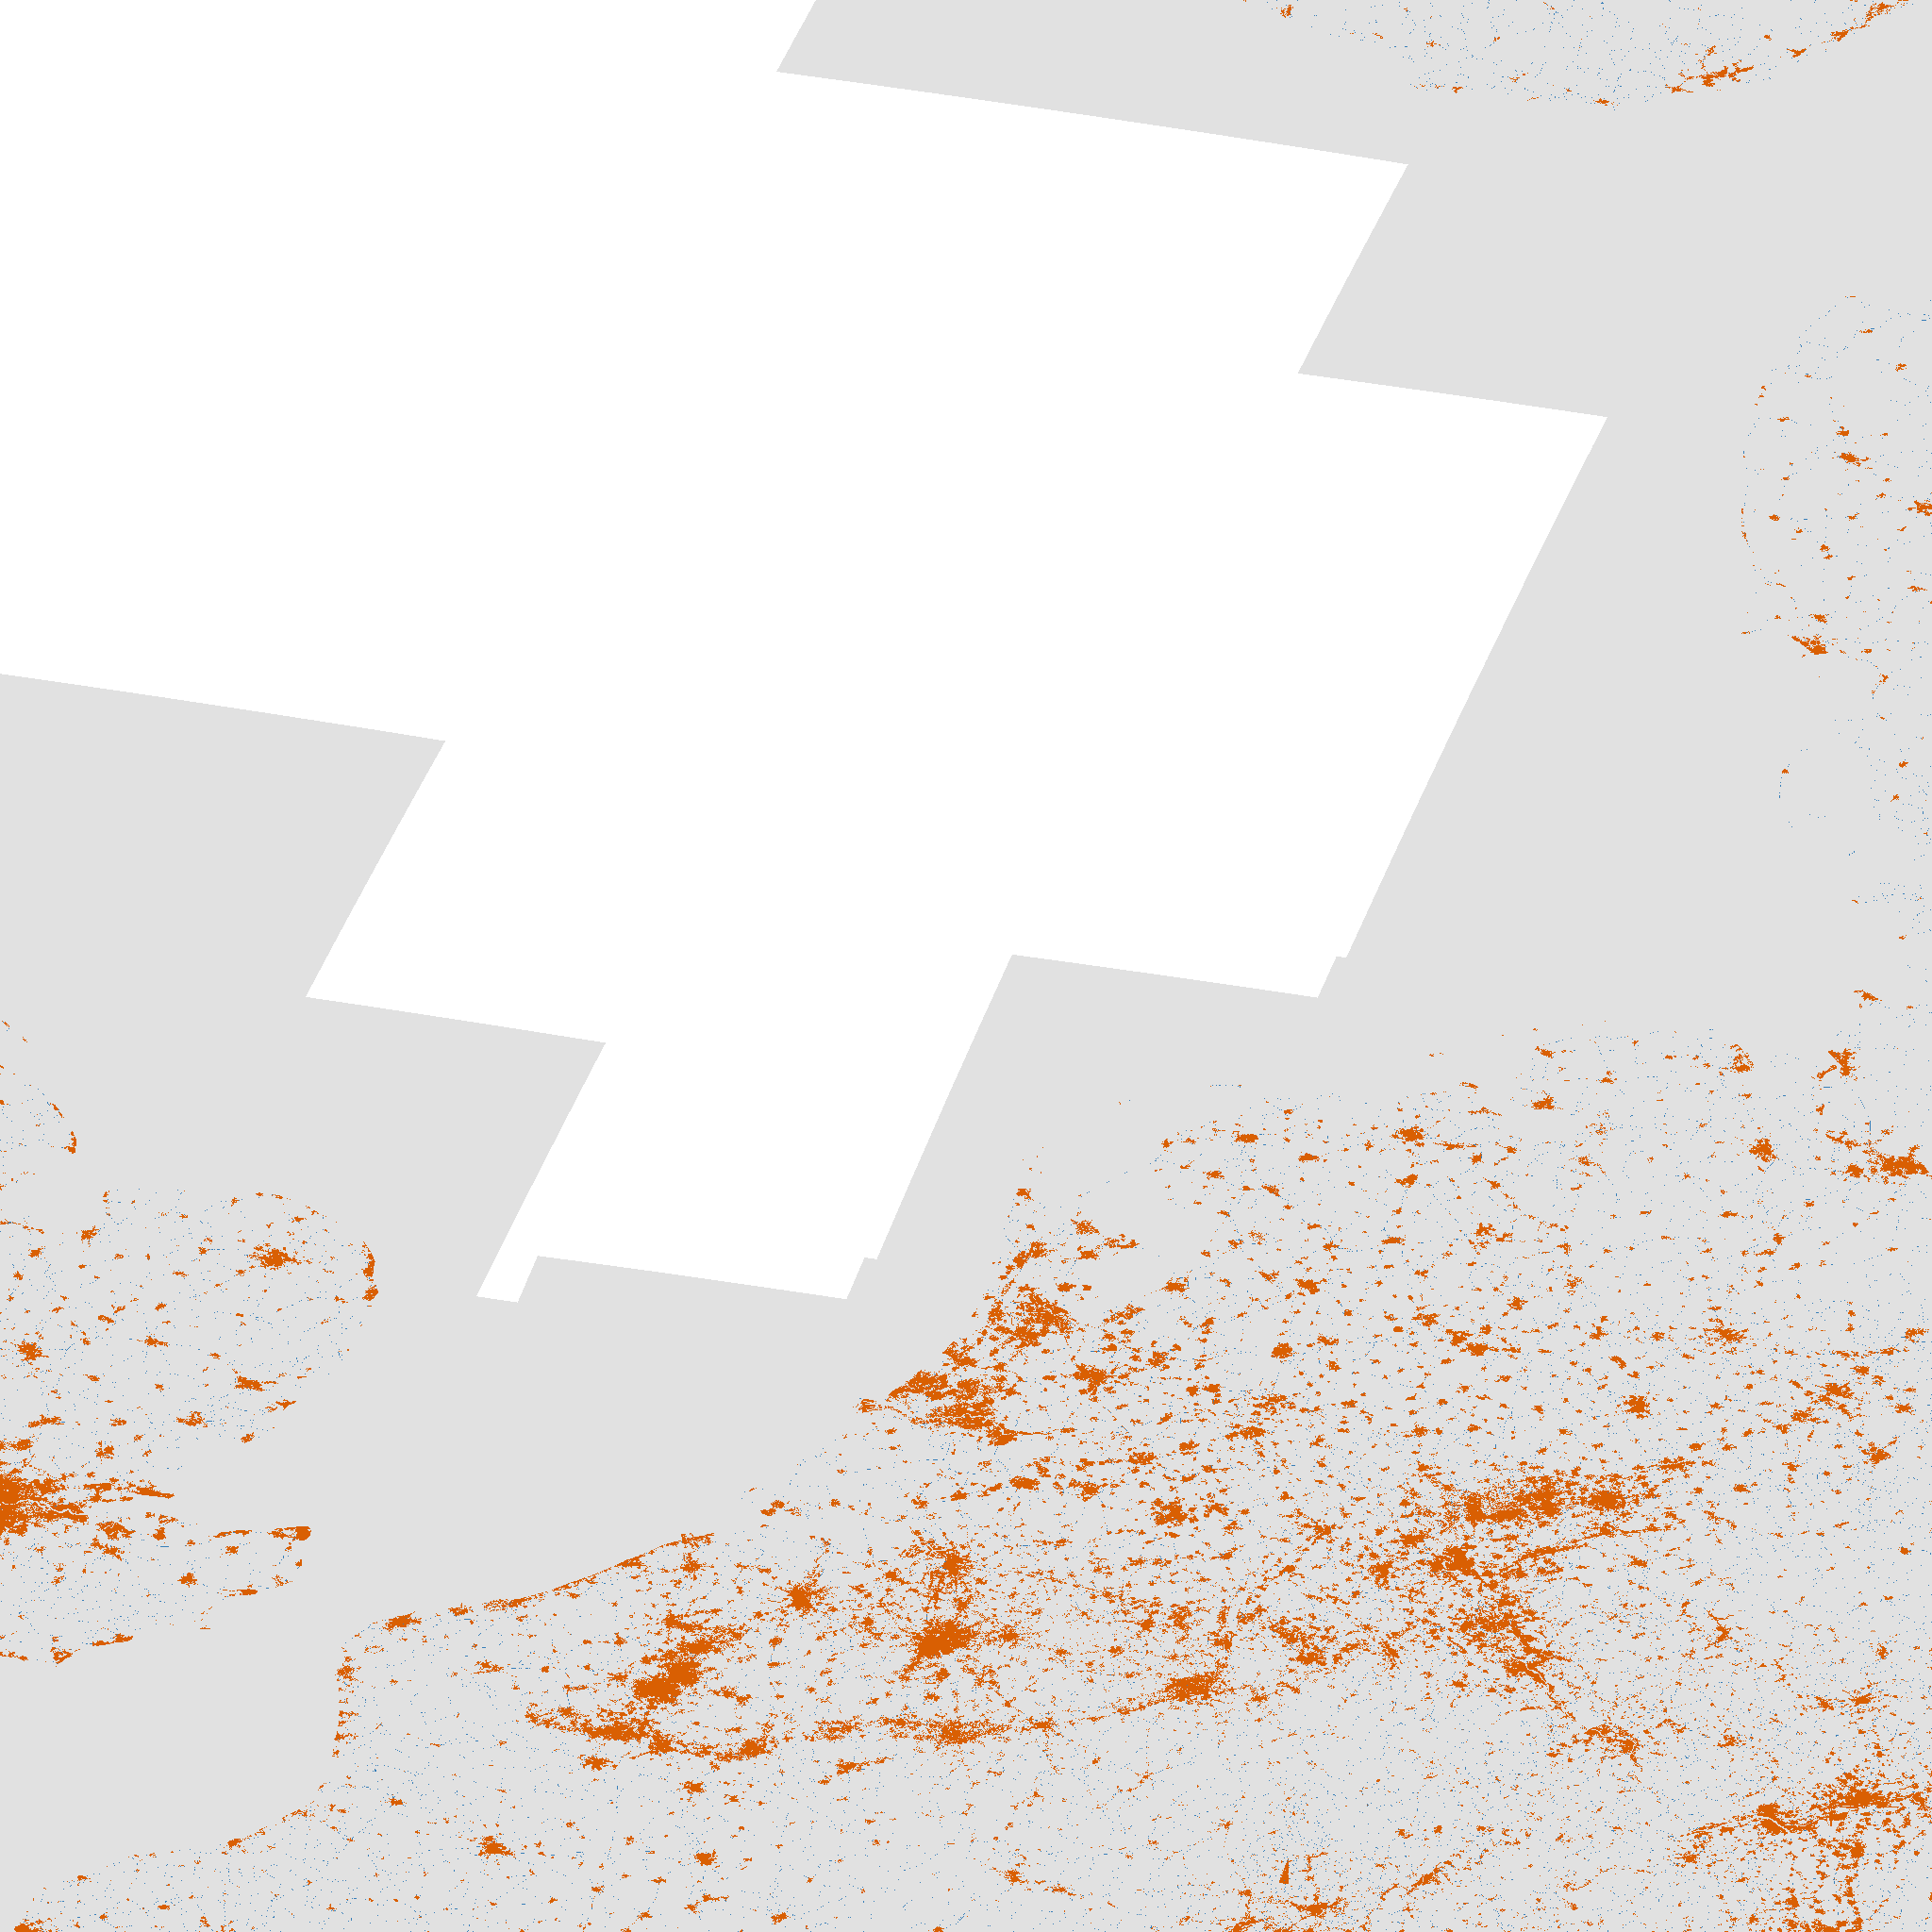

In [107]:
Image.fromarray(tiled)